#  Import Statements

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import PIL

import extcolors
from colormap import rgb2hex

# Color Extractor Function

Enter Image Name to Extract Colors: images-8.jpg


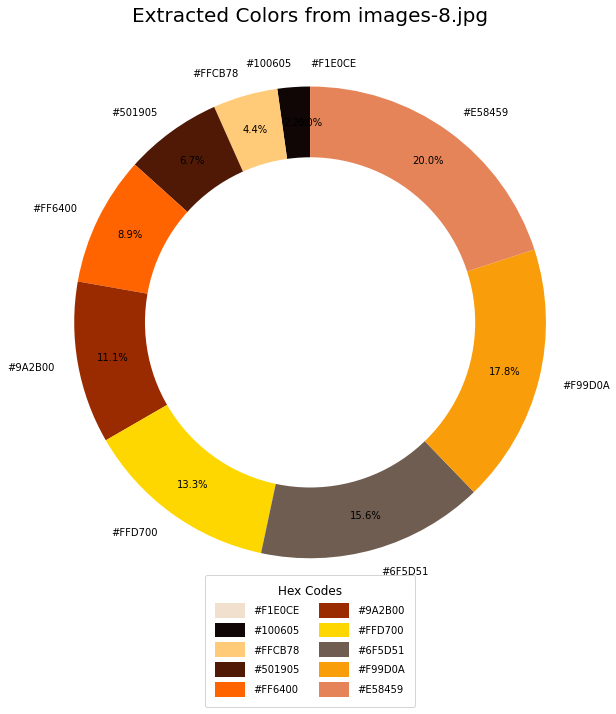

In [118]:
def color_extractor():
    # name of image or path to image
    img_name = input('Enter Image Name to Extract Colors: ') # e.g 'image.jpg' or path to image
    try:
        img = Image.open(img_name)
    except PIL.UnidentifiedImageError:
        print('Unknown Image Type. Please try using another image')
    else:
        # extract RGB color codes from image and the number of occurrences of the color
        colors, pixel_count = extcolors.extract_from_image(img)

        RGB = []
        occurence = []
        for color in colors:
            RGB.append(color[0])
            occurence.append(color[1])
        
        # convert RGB color codes to hex code
        HEX = []
        for rgb in RGB:
            hex_code = rgb2hex(rgb[0],rgb[1], rgb[2])
            HEX.append(hex_code)
        
        # create dataframe containing color hex codes and occurences
        color_dict = {'hex_code': HEX, 'occurence': occurence}
        df = pd.DataFrame(color_dict)
        
        # chart
        plt.figure(figsize=(16,10))
        plt.title(f'Extracted Colors from {img_name}', fontsize=20)
        plt.pie(df.index,
                labels=df.hex_code,
                colors=df.hex_code,
                autopct='%1.1f%%',
                startangle=90,
                pctdistance=0.85)
        
        # create hole in chart. Could have used a donut chart from plotly though
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        
        # Create Legend for chart
        plt.legend(labels=df.hex_code,
                   loc='center', 
                   bbox_to_anchor=(0.5, -0.04),
                   ncol=2,
                  title='Hex Codes', 
                  handlelength=3.0,
                  handleheight=1.9,
                  borderpad=1.0,
                  title_fontsize='large')
        ax1.axis('equal')  
        plt.tight_layout()
        plt.show()
    
color_extractor()